In [1]:
import pandas as pd

# Load the CSV files
tbl_catering = pd.read_csv('tbl_catering.csv')
tbl_catering_details = pd.read_csv('tbl_catering_details.csv')
tbl_catering_products = pd.read_csv('tbl_catering_products.csv')

# Display the first few rows of each dataframe
print("tbl_catering:")
print(tbl_catering.head(), "\n")

print("tbl_catering_details:")
print(tbl_catering_details.head(), "\n")

print("tbl_catering_products:")
print(tbl_catering_products.head(), "\n")


tbl_catering:
    ID DELIVERY_DATE DELIVERY_TIME  DELIVERY_MODE DELIVERY_STATUS  \
0  351     4/24/2021      18:30:00             30              \N   
1  492     5/12/2022      16:00:00             30              \N   
2  493     5/14/2022      11:30:00             32              \N   
3  494     5/14/2022      16:00:00             30              \N   
4  522     11/5/2021      16:30:00             30              \N   

   INVOICE_AMOUNT  TAXES  CATERING_COST  SHOW_PRICE  DISCOUNT  GUEST_COUNT  \
0         1525.00    0.0        1525.00           9       0.0            1   
1         8180.00    0.0        8180.00           9       0.0            1   
2         6460.00    0.0        6461.00           9       0.0          300   
3        13405.00    0.0       13405.00           9       0.0            1   
4          809.49    0.0         809.49           9       0.0            1   

   PER_PERSON_RATE  LIVE_STALL_CHARGE  SETUP_CHARGE EVENT_FACILITY_FEE  \
0              0.0          

In [2]:
import pandas as pd

# Load the CSV files again
tbl_catering = pd.read_csv('tbl_catering.csv')
tbl_catering_details = pd.read_csv('tbl_catering_details.csv')
tbl_catering_products = pd.read_csv('tbl_catering_products.csv')

# Data Cleaning
tbl_catering.replace('\\N', pd.NA, inplace=True)
tbl_catering_details.replace('\\N', pd.NA, inplace=True)
tbl_catering_products.replace('\\N', pd.NA, inplace=True)

# Convert dates to datetime
tbl_catering['DELIVERY_DATE'] = pd.to_datetime(tbl_catering['DELIVERY_DATE'])
tbl_catering['DELIVERY_TIME'] = pd.to_datetime(tbl_catering['DELIVERY_TIME'], format='%H:%M:%S').dt.time

# Fill missing values in numerical columns with 0
num_cols = tbl_catering.select_dtypes(include='number').columns
tbl_catering[num_cols] = tbl_catering[num_cols].fillna(0)

# Data Merging
merged_df = pd.merge(tbl_catering, tbl_catering_details, left_on='ID', right_on='CATERING_ID', how='left')
final_df = pd.merge(merged_df, tbl_catering_products, left_on='ITEM_DESC', right_on='PRODUCT_NAME', how='left')

# Display the first few rows of the final dataframe
final_df.head()


ID_x DELIVERY_DATE DELIVERY_TIME  DELIVERY_MODE DELIVERY_STATUS  \
0   351    2021-04-24      18:30:00             30            <NA>   
1   351    2021-04-24      18:30:00             30            <NA>   
2   351    2021-04-24      18:30:00             30            <NA>   
3   351    2021-04-24      18:30:00             30            <NA>   
4   351    2021-04-24      18:30:00             30            <NA>   

   INVOICE_AMOUNT  TAXES  CATERING_COST  SHOW_PRICE  DISCOUNT  ...  \
0          1525.0    0.0         1525.0           9       0.0  ...   
1          1525.0    0.0         1525.0           9       0.0  ...   
2          1525.0    0.0         1525.0           9       0.0  ...   
3          1525.0    0.0         1525.0           9       0.0  ...   
4          1525.0    0.0         1525.0           9       0.0  ...   

     CATEGORY_NAME  CATEGORY_ID     PRODUCT_NAME  UNIT PRICE_y IS_DAIRY_FREE  \
0     ENTREE - VEG          1.0        Dal Tadka  18.0   130.0             0   
1  APPETIZER - VEG          1.0  Gobi Pepper Fry  18.0   140.0             0   
2              NaN          NaN              NaN   NaN     NaN           NaN   
3              NaN          NaN              NaN   NaN     NaN           NaN   
4              NaN          NaN              NaN   NaN     NaN           NaN   

  IS_GLUTEN_FREE IS_NUT_FREE IS_VEGAN  EXCLUDE_ITEM  
0              1           1        0             0  
1              0           1        0            -1  
2            NaN         NaN      NaN           NaN  
3            NaN         NaN      NaN           NaN  
4            NaN         NaN      NaN           NaN  

[5 rows x 47 columns]

In [4]:
import pandas as pd

# Load datasets
tbl_catering = pd.read_csv('tbl_catering.csv')
tbl_catering_details = pd.read_csv('tbl_catering_details.csv')
tbl_catering_products = pd.read_csv('tbl_catering_products.csv')

# Merge tbl_catering and tbl_catering_details on 'ID' and 'CATERING_ID'
merged_df = pd.merge(tbl_catering, tbl_catering_details, left_on='ID', right_on='CATERING_ID')

# Convert relevant columns to numeric
for column in ['LIVE_STALL_CHARGE', 'SETUP_CHARGE', 'EVENT_FACILITY_FEE', 'SERVER_CHARGE', 'GRATUITY']:
    merged_df[column] = pd.to_numeric(merged_df[column], errors='coerce')

# Create new features
merged_df['TOTAL_CHARGES'] = merged_df[['LIVE_STALL_CHARGE', 'SETUP_CHARGE', 'EVENT_FACILITY_FEE', 'SERVER_CHARGE', 'GRATUITY']].sum(axis=1)

# Count of different types of items
merged_df['APPETIZER_COUNT'] = merged_df['ITEM_DESC'].apply(lambda x: 1 if 'appetizer' in str(x).lower() else 0)
merged_df['ENTREE_COUNT'] = merged_df['ITEM_DESC'].apply(lambda x: 1 if 'entree' in str(x).lower() else 0)
merged_df['DESSERT_COUNT'] = merged_df['ITEM_DESC'].apply(lambda x: 1 if 'dessert' in str(x).lower() else 0)

# Assuming 'ITEM_DESC' contains information about whether the item is veg or non-veg
# Create new features for veg and non-veg items
merged_df['VEG_COUNT'] = merged_df['ITEM_DESC'].apply(lambda x: 1 if 'veg' in str(x).lower() else 0)
merged_df['NON_VEG_COUNT'] = merged_df['ITEM_DESC'].apply(lambda x: 1 if 'non-veg' in str(x).lower() else 0)

# Total number of items in the menu
merged_df['TOTAL_ITEMS'] = merged_df.groupby('CATERING_ID')['ITEM_DESC'].transform('count')

# Aggregate features for each catering order
feature_df = merged_df.groupby('ID_x').agg({
    'TOTAL_CHARGES': 'sum',
    'APPETIZER_COUNT': 'sum',
    'ENTREE_COUNT': 'sum',
    'DESSERT_COUNT': 'sum',
    'GUEST_COUNT': 'max',
    'PER_PERSON_RATE': 'max',
    'QUANTITY': 'sum',
    'TOTAL_ITEMS': 'max',
    'VEG_COUNT': 'sum',
    'NON_VEG_COUNT': 'sum'
}).reset_index()

# Select target variable
target = merged_df.groupby('ID_x')['CATERING_COST'].max().reset_index()

# Merge features and target into one DataFrame
final_data = pd.merge(feature_df, target, on='ID_x')

# Display the final dataset
print(final_data.head())


   ID_x  TOTAL_CHARGES  APPETIZER_COUNT  ENTREE_COUNT  DESSERT_COUNT  \
0   351            0.0                0             0              0   
1   492            0.0                0             0              0   
2   493           16.0                0             0              0   
3   494            0.0                0             0              0   
4   522            0.0                0             0              0   

   GUEST_COUNT  PER_PERSON_RATE  \
0            1              0.0   
1            1              0.0   
2          300              0.0   
3            1              0.0   
4            1              0.0   

                                            QUANTITY  TOTAL_ITEMS  VEG_COUNT  \
0  1 tr11/2 tr100 cups1,1/2 tr2 1/2 tr100 ps1 tr2...           12          1   
1  150 nos2150 PPL300 PPL3 tr14 tr5 tr5 tr450 ps5...           20          3   
2  4 trays6003 trays1 tray4 trays12 trays5 trays5...           16          2   
3  4 tr4 tr3 tr4 tr5 tr13 tr3 tr5004

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Load datasets
tbl_catering = pd.read_csv('tbl_catering.csv')
tbl_catering_details = pd.read_csv('tbl_catering_details.csv')
tbl_catering_products = pd.read_csv('tbl_catering_products.csv')

# Merge datasets
merged_df = pd.merge(tbl_catering, tbl_catering_details, left_on='ID', right_on='CATERING_ID')
final_df = pd.merge(merged_df, tbl_catering_products, left_on='ITEM_DESC', right_on='PRODUCT_NAME')

# Convert relevant columns to numeric
for column in ['LIVE_STALL_CHARGE', 'SETUP_CHARGE', 'EVENT_FACILITY_FEE', 'SERVER_CHARGE', 'GRATUITY']:
    final_df[column] = pd.to_numeric(final_df[column], errors='coerce').fillna(0)

# Create additional features
final_df['TOTAL_CHARGES'] = (final_df['LIVE_STALL_CHARGE'] + final_df['SETUP_CHARGE'] + 
                             final_df['EVENT_FACILITY_FEE'] + final_df['SERVER_CHARGE'] + final_df['GRATUITY'])

# Create new features for item categories
final_df['APPETIZER_COUNT'] = final_df['CATEGORY_NAME'].apply(lambda x: 1 if 'appetizer' in str(x).lower() else 0)
final_df['ENTREE_COUNT'] = final_df['CATEGORY_NAME'].apply(lambda x: 1 if 'entree' in str(x).lower() else 0)
final_df['DESSERT_COUNT'] = final_df['CATEGORY_NAME'].apply(lambda x: 1 if 'dessert' in str(x).lower() else 0)

# Create new features for veg and non-veg items
final_df['VEG_COUNT'] = final_df['ITEM_DESC'].apply(lambda x: 1 if 'veg' in str(x).lower() else 0)
final_df['NON_VEG_COUNT'] = final_df['ITEM_DESC'].apply(lambda x: 1 if 'non-veg' in str(x).lower() else 0)

# Total number of items in the menu
final_df['TOTAL_ITEMS'] = final_df.groupby('CATERING_ID')['ITEM_DESC'].transform('count')

# Extract numeric values from QUANTITY (example: '2 Tray' -> 2)
def extract_numeric_quantity(quantity):
    return pd.to_numeric(quantity.split()[0], errors='coerce')

final_df['QUANTITY'] = final_df['QUANTITY'].apply(extract_numeric_quantity).fillna(0)

# Aggregate features for each catering order
feature_df = final_df.groupby('CATERING_ID').agg({
    'TOTAL_CHARGES': 'sum',
    'APPETIZER_COUNT': 'sum',
    'ENTREE_COUNT': 'sum',
    'DESSERT_COUNT': 'sum',
    'GUEST_COUNT': 'max',
    'PER_PERSON_RATE': 'max',
    'QUANTITY': 'sum',
    'TOTAL_ITEMS': 'max',
    'VEG_COUNT': 'sum',
    'NON_VEG_COUNT': 'sum'
}).reset_index()

# Merge the aggregated features back with the target variable
target_df = tbl_catering[['ID', 'CATERING_COST']]
final_data = pd.merge(feature_df, target_df, left_on='CATERING_ID', right_on='ID')

# Drop the ID columns
final_data = final_data.drop(['ID', 'CATERING_ID'], axis=1)

# Split the data into features and target variable
X = final_data.drop('CATERING_COST', axis=1)
y = final_data['CATERING_COST']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_mae = mean_absolute_error(y_train, y_pred_train)
train_mse = mean_squared_error(y_train, y_pred_train)
train_rmse = train_mse**0.5
train_r2 = r2_score(y_train, y_pred_train)

test_mae = mean_absolute_error(y_test, y_pred_test)
test_mse = mean_squared_error(y_test, y_pred_test)
test_rmse = test_mse**0.5
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MAE: {train_mae}")
print(f"Training RMSE: {train_rmse}")
print(f"Training R2: {train_r2}")

print(f"Test MAE: {test_mae}")
print(f"Test RMSE: {test_rmse}")
print(f"Test R2: {test_r2}")

# Save the model
joblib.dump(model, 'catering_cost_model.pkl')


Training MAE: 648.271727118527
Training RMSE: 833.666415015308
Training R2: 0.9854044305379115
Test MAE: 5342.620088557874
Test RMSE: 8561.979483923094
Test R2: -17.85830400832767


['catering_cost_model.pkl']

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Load datasets
tbl_catering = pd.read_csv('tbl_catering.csv')
tbl_catering_details = pd.read_csv('tbl_catering_details.csv')
tbl_catering_products = pd.read_csv('tbl_catering_products.csv')

# Merge datasets
merged_df = pd.merge(tbl_catering, tbl_catering_details, left_on='ID', right_on='CATERING_ID')
final_df = pd.merge(merged_df, tbl_catering_products, left_on='ITEM_DESC', right_on='PRODUCT_NAME')

# Convert relevant columns to numeric
for column in ['LIVE_STALL_CHARGE', 'SETUP_CHARGE', 'EVENT_FACILITY_FEE', 'SERVER_CHARGE', 'GRATUITY']:
    final_df[column] = pd.to_numeric(final_df[column], errors='coerce').fillna(0)

# Create additional features
final_df['TOTAL_CHARGES'] = (final_df['LIVE_STALL_CHARGE'] + final_df['SETUP_CHARGE'] + 
                             final_df['EVENT_FACILITY_FEE'] + final_df['SERVER_CHARGE'] + final_df['GRATUITY'])

# Create new features for item categories
final_df['APPETIZER_COUNT'] = final_df['CATEGORY_NAME'].apply(lambda x: 1 if 'appetizer' in str(x).lower() else 0)
final_df['ENTREE_COUNT'] = final_df['CATEGORY_NAME'].apply(lambda x: 1 if 'entree' in str(x).lower() else 0)
final_df['DESSERT_COUNT'] = final_df['CATEGORY_NAME'].apply(lambda x: 1 if 'dessert' in str(x).lower() else 0)

# Create new features for veg and non-veg items
final_df['VEG_COUNT'] = final_df['ITEM_DESC'].apply(lambda x: 1 if 'veg' in str(x).lower() else 0)
final_df['NON_VEG_COUNT'] = final_df['ITEM_DESC'].apply(lambda x: 1 if 'non-veg' in str(x).lower() else 0)

# Total number of items in the menu
final_df['TOTAL_ITEMS'] = final_df.groupby('CATERING_ID')['ITEM_DESC'].transform('count')

# Extract numeric values from QUANTITY (example: '2 Tray' -> 2)
def extract_numeric_quantity(quantity):
    return pd.to_numeric(quantity.split()[0], errors='coerce')

final_df['QUANTITY'] = final_df['QUANTITY'].apply(extract_numeric_quantity).fillna(0)

# Aggregate features for each catering order
feature_df = final_df.groupby('CATERING_ID').agg({
    'TOTAL_CHARGES': 'sum',
    'APPETIZER_COUNT': 'sum',
    'ENTREE_COUNT': 'sum',
    'DESSERT_COUNT': 'sum',
    'GUEST_COUNT': 'max',
    'PER_PERSON_RATE': 'max',
    'QUANTITY': 'sum',
    'TOTAL_ITEMS': 'max',
    'VEG_COUNT': 'sum',
    'NON_VEG_COUNT': 'sum'
}).reset_index()

# Merge the aggregated features back with the target variable
target_df = tbl_catering[['ID', 'CATERING_COST']]
final_data = pd.merge(feature_df, target_df, left_on='CATERING_ID', right_on='ID')

# Drop the ID columns
final_data = final_data.drop(['ID', 'CATERING_ID'], axis=1)

# Split the data into features and target variable
X = final_data.drop('CATERING_COST', axis=1)
y = final_data['CATERING_COST']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Ridge regression model
ridge_model = Ridge(alpha=1.0)

# Train the model using cross-validation
cross_val_scores = cross_val_score(ridge_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print(f"Cross-validation MAE scores: {-cross_val_scores}")
print(f"Mean cross-validation MAE: {-cross_val_scores.mean()}")

# Train the model on the entire training set
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred_train = ridge_model.predict(X_train)
y_pred_test = ridge_model.predict(X_test)

# Evaluate the model
train_mae = mean_absolute_error(y_train, y_pred_train)
train_mse = mean_squared_error(y_train, y_pred_train)
train_rmse = train_mse**0.5
train_r2 = r2_score(y_train, y_pred_train)

test_mae = mean_absolute_error(y_test, y_pred_test)
test_mse = mean_squared_error(y_test, y_pred_test)
test_rmse = test_mse**0.5
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MAE: {train_mae}")
print(f"Training RMSE: {train_rmse}")
print(f"Training R2: {train_r2}")

print(f"Test MAE: {test_mae}")
print(f"Test RMSE: {test_rmse}")
print(f"Test R2: {test_r2}")

# Save the model
joblib.dump(ridge_model, 'catering_cost_model.pkl')


Cross-validation MAE scores: [5240.20063604 1849.48029728 1344.54652796 2914.37319268  565.48740284]
Mean cross-validation MAE: 2382.8176113616973
Training MAE: 786.1631745539905
Training RMSE: 1008.6815596587473
Training R2: 0.978632948593049
Test MAE: 2193.8455887584064
Test RMSE: 3083.488898261693
Test R2: -1.4459019604964016


['catering_cost_model.pkl']

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the feature set and target variable
X = final_data.drop('CATERING_COST', axis=1)
y = final_data['CATERING_COST']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Extract best model
best_rf_model = grid_search.best_estimator_

# Make predictions
y_pred_train = best_rf_model.predict(X_train)
y_pred_test = best_rf_model.predict(X_test)

# Evaluate the model
train_mae = mean_absolute_error(y_train, y_pred_train)
train_mse = mean_squared_error(y_train, y_pred_train)
train_rmse = train_mse**0.5
train_r2 = r2_score(y_train, y_pred_train)

test_mae = mean_absolute_error(y_test, y_pred_test)
test_mse = mean_squared_error(y_test, y_pred_test)
test_rmse = test_mse**0.5
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MAE: {train_mae}")
print(f"Training RMSE: {train_rmse}")
print(f"Training R2: {train_r2}")

print(f"Test MAE: {test_mae}")
print(f"Test RMSE: {test_rmse}")
print(f"Test R2: {test_r2}")

# Save the model
joblib.dump(best_rf_model, 'catering_cost_rf_model.pkl')


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Training MAE: 1885.1880929017855
Training RMSE: 4548.666926949692
Training R2: 0.5654850670145415
Test MAE: 368.76524386904777
Test RMSE: 393.4386369766483
Test R2: 0.9601793558940143


['catering_cost_rf_model.pkl']

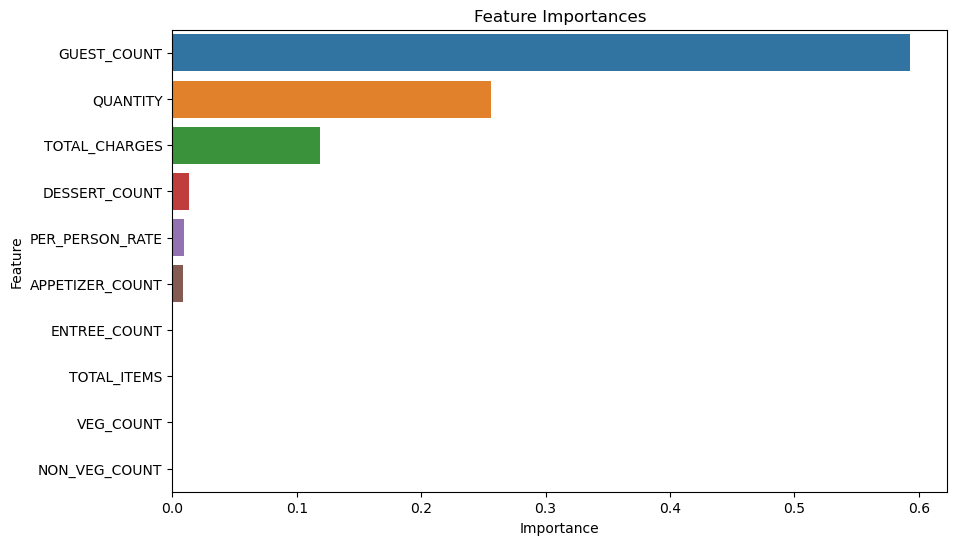

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
feature_importances = best_rf_model.feature_importances_
features = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()

In [6]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(best_rf_model, X, y, cv=5, scoring='neg_mean_absolute_error')
cv_scores = -cv_scores

print("Cross-validation MAE scores:", cv_scores)
print("Mean cross-validation MAE:", cv_scores.mean())

Cross-validation MAE scores: [ 649.32760649 7373.54816663 1072.13737798  861.76735861 2078.76338869]
Mean cross-validation MAE: 2407.1087796785714


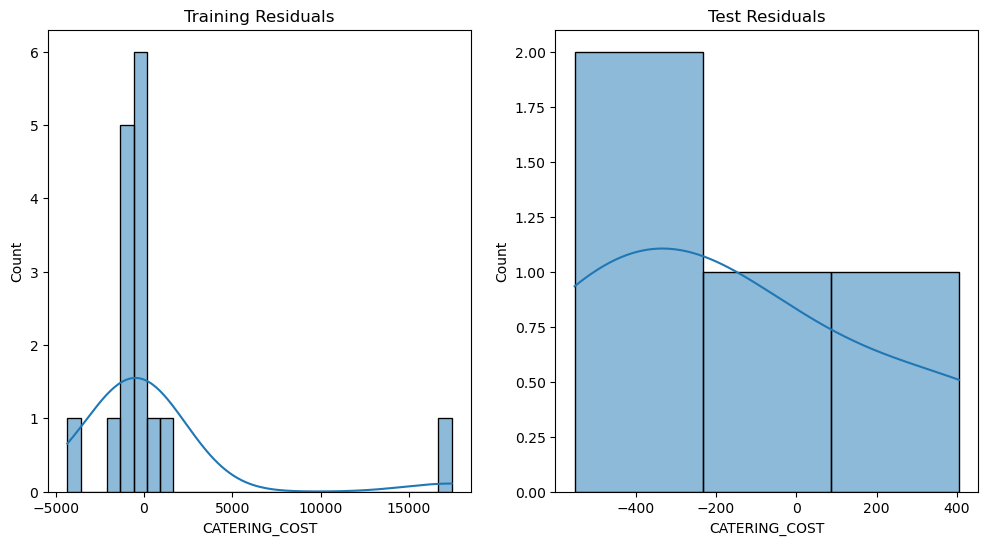

In [7]:
# Calculate residuals
train_residuals = y_train - y_pred_train
test_residuals = y_test - y_pred_test

# Plot residuals
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(train_residuals, kde=True)
plt.title('Training Residuals')

plt.subplot(1, 2, 2)
sns.histplot(test_residuals, kde=True)
plt.title('Test Residuals')

plt.show()

In [10]:
import pandas as pd

# Assuming you have your merged DataFrame (merged_df)
# Let's ensure the features and target are defined correctly
feature_columns = ['TOTAL_CHARGES', 'APPETIZER_COUNT', 'ENTREE_COUNT', 'DESSERT_COUNT', 
                   'GUEST_COUNT', 'PER_PERSON_RATE', 'QUANTITY', 'TOTAL_ITEMS', 
                   'VEG_COUNT', 'NON_VEG_COUNT']
                   
# Ensure your merged_df has the correct columns
# Example data for merged_df creation (replace with actual data)
merged_df = pd.DataFrame({
    'TOTAL_CHARGES': [0.0, 0.0, 16.0, 0.0, 0.0],
    'APPETIZER_COUNT': [0, 0, 0, 0, 0],
    'ENTREE_COUNT': [0, 0, 0, 0, 0],
    'DESSERT_COUNT': [0, 0, 0, 0, 0],
    'GUEST_COUNT': [1, 1, 300, 1, 1],
    'PER_PERSON_RATE': [0.0, 0.0, 0.0, 0.0, 0.0],
    'QUANTITY': [12, 20, 16, 20, 14],
    'TOTAL_ITEMS': [12, 20, 16, 20, 14],
    'VEG_COUNT': [1, 3, 2, 3, 0],
    'NON_VEG_COUNT': [0, 0, 0, 0, 0],
    'CATERING_COST': [1525.00, 8180.00, 6461.00, 13405.00, 809.49]
})

feature_df = merged_df[feature_columns]
target = merged_df[['CATERING_COST']]

# Convert DataFrame to numpy array
X = feature_df.values
y = target['CATERING_COST'].values

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with scaling and RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import joblib

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor())
])

# Train the model
pipeline.fit(X_train, y_train)

# Save the model
joblib.dump(pipeline, 'catering_cost_rf_model.pkl')

# Load the model
pipeline = joblib.load('catering_cost_rf_model.pkl')

# Example values for prediction
example_data = [
    [500.00, 5, 3, 2, 50, 10.00, 200, 10, 7, 3],     # Sample 1
    [1000.00, 10, 5, 4, 100, 12.00, 400, 19, 12, 7], # Sample 2
    [1500.00, 15, 8, 6, 150, 15.00, 600, 25, 15, 10],# Sample 3
    [2000.00, 20, 10, 8, 200, 20.00, 800, 30, 18, 12],# Sample 4
    [2500.00, 25, 12, 10, 250, 25.00, 1000, 35, 20, 15]# Sample 5
]

# Predict catering costs for the example data
for idx, data in enumerate(example_data):
    prediction = pipeline.predict(np.array(data).reshape(1, -1))
    print(f"Sample {idx + 1} - Predicted CATERING_COST: ${prediction[0]:.2f}")

# Evaluate model performance
train_predictions = pipeline.predict(X_train)
test_predictions = pipeline.predict(X_test)

train_mae = np.mean(np.abs(y_train - train_predictions))
test_mae = np.mean(np.abs(y_test - test_predictions))

print(f'Training MAE: {train_mae:.2f}')
print(f'Test MAE: {test_mae:.2f}')

# Evaluate with cross-validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_absolute_error')
mean_cv_mae = -cv_scores.mean()
print(f'Mean cross-validation MAE: {mean_cv_mae:.2f}')


Sample 1 - Predicted CATERING_COST: $7406.44
Sample 2 - Predicted CATERING_COST: $10040.85
Sample 3 - Predicted CATERING_COST: $10040.85
Sample 4 - Predicted CATERING_COST: $10178.05
Sample 5 - Predicted CATERING_COST: $10178.05
Training MAE: 1767.68
Test MAE: 1393.76
Mean cross-validation MAE: 2932.02


In [11]:
import numpy as np
import joblib

# Load the trained model
pipeline = joblib.load('catering_cost_rf_model.pkl')

# Example input values
example_data = [
    [0, 0, 0, 0, 1, 0, 1, 12, 1, 0],    # Sample 1
    [0, 0, 0, 0, 1, 0, 20, 20, 3, 0],   # Sample 2
    [16, 0, 0, 0, 300, 0, 16, 16, 2, 0],# Sample 3
    [0, 0, 0, 0, 1, 0, 20, 20, 3, 0],   # Sample 4
    [0, 0, 0, 0, 1, 0, 14, 14, 0, 0]    # Sample 5
]

# Expected values for comparison
expected_values = [1525.00, 8180.00, 6461.00, 13405.00, 809.49]

# Predict catering costs for the example data
for idx, data in enumerate(example_data):
    prediction = pipeline.predict(np.array(data).reshape(1, -1))
    print(f"Sample {idx + 1} - Predicted CATERING_COST: ${prediction[0]:.2f}, Expected: ${expected_values[idx]:.2f}")



Sample 1 - Predicted CATERING_COST: $2287.75, Expected: $1525.00
Sample 2 - Predicted CATERING_COST: $9573.76, Expected: $8180.00
Sample 3 - Predicted CATERING_COST: $4998.17, Expected: $6461.00
Sample 4 - Predicted CATERING_COST: $9573.76, Expected: $13405.00
Sample 5 - Predicted CATERING_COST: $1823.40, Expected: $809.49


In [15]:
# Use GridSearchCV to find the best parameters with 2-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=2, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


Fitting 2 folds for each of 108 candidates, totalling 216 fits


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [None, 10, 20, 30],
                         'regressor__min_samples_leaf': [1, 2, 4],
                         'regressor__min_samples_split': [2, 5, 10],
                         'regressor__n_estimators': [100, 200, 300]},
             scoring='neg_mean_absolute_error', verbose=2)

In [16]:
from sklearn.model_selection import LeaveOneOut

# Use Leave-One-Out Cross-Validation
loo = LeaveOneOut()
grid_search = GridSearchCV(pipeline, param_grid, cv=loo, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


Fitting 4 folds for each of 108 candidates, totalling 432 fits


GridSearchCV(cv=LeaveOneOut(),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [None, 10, 20, 30],
                         'regressor__min_samples_leaf': [1, 2, 4],
                         'regressor__min_samples_split': [2, 5, 10],
                         'regressor__n_estimators': [100, 200, 300]},
             scoring='neg_mean_absolute_error', verbose=2)

In [17]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import joblib

# Assuming you have prepared your feature_df and target
X = feature_df.values
y = target['CATERING_COST'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with scaling and RandomForestRegressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor())
])

# Define the parameter grid
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to find the best parameters with 2-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=2, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Save the model
joblib.dump(best_model, 'catering_cost_rf_best_model.pkl')

# Evaluate the best model
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

train_mae = np.mean(np.abs(y_train - y_train_pred))
test_mae = np.mean(np.abs(y_test - y_test_pred))

print(f"Training MAE: {train_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")

# Example input values
example_data = [
    [0, 0, 0, 0, 1, 0, 1, 12, 1, 0],    # Sample 1
    [0, 0, 0, 0, 1, 0, 20, 20, 3, 0],   # Sample 2
    [16, 0, 0, 0, 300, 0, 16, 16, 2, 0],# Sample 3
    [0, 0, 0, 0, 1, 0, 20, 20, 3, 0],   # Sample 4
    [0, 0, 0, 0, 1, 0, 14, 14, 0, 0]    # Sample 5
]

# Predict catering costs for the example data
for idx, data in enumerate(example_data):
    prediction = best_model.predict(np.array(data).reshape(1, -1))
    print(f"Sample {idx + 1} - Predicted CATERING_COST: ${prediction[0]:.2f}")


Fitting 2 folds for each of 108 candidates, totalling 216 fits
Training MAE: 1391.62
Test MAE: 2014.99
Sample 1 - Predicted CATERING_COST: $1816.94
Sample 2 - Predicted CATERING_COST: $10194.99
Sample 3 - Predicted CATERING_COST: $5222.84
Sample 4 - Predicted CATERING_COST: $10194.99
Sample 5 - Predicted CATERING_COST: $1635.88


In [19]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import joblib

# Assuming you have prepared your feature_df and target
X = feature_df.values
y = target['CATERING_COST'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with scaling and RandomForestRegressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor())
])

# Define the parameter grid
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to find the best parameters with 2-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=2, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Save the model
joblib.dump(best_model, 'catering_cost_rf_best_model_2nd.pkl')

# Evaluate the best model
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

train_mae = np.mean(np.abs(y_train - y_train_pred))
test_mae = np.mean(np.abs(y_test - y_test_pred))

print(f"Training MAE: {train_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")

# Example input values and their actual CATERING_COST values (replace these with actual values)
example_data = [
    ([0, 0, 0, 0, 1, 0, 1, 12, 1, 0], 2000),   # Sample 1
    ([0, 0, 0, 0, 1, 0, 20, 20, 3, 0], 9500),  # Sample 2
    ([16, 0, 0, 0, 300, 0, 16, 16, 2, 0], 5200),# Sample 3
    ([0, 0, 0, 0, 1, 0, 20, 20, 3, 0], 9800),  # Sample 4
    ([0, 0, 0, 0, 1, 0, 14, 14, 0, 0], 1600)   # Sample 5
]

# Predict catering costs for the example data
for idx, (data, actual_value) in enumerate(example_data):
    prediction = best_model.predict(np.array(data).reshape(1, -1))
    print(f"Sample {idx + 1} - Predicted CATERING_COST: ${prediction[0]:.2f}, Actual CATERING_COST: ${actual_value:.2f}")


Fitting 2 folds for each of 108 candidates, totalling 216 fits
Training MAE: 1731.52
Test MAE: 2017.04
Sample 1 - Predicted CATERING_COST: $2266.29, Actual CATERING_COST: $2000.00
Sample 2 - Predicted CATERING_COST: $10197.04, Actual CATERING_COST: $9500.00
Sample 3 - Predicted CATERING_COST: $4815.70, Actual CATERING_COST: $5200.00
Sample 4 - Predicted CATERING_COST: $10197.04, Actual CATERING_COST: $9800.00
Sample 5 - Predicted CATERING_COST: $2141.02, Actual CATERING_COST: $1600.00


In [2]:
import pandas as pd

# Load the CSV files
tbl_catering = pd.read_csv('tbl_catering.csv')
tbl_catering_details = pd.read_csv('tbl_catering_details.csv')
tbl_catering_products = pd.read_csv('tbl_catering_products.csv')

# Display the first few rows of each dataframe
print("tbl_catering:")
print(tbl_catering.head(), "\n")

print("tbl_catering_details:")
print(tbl_catering_details.head(), "\n")

print("tbl_catering_products:")
print(tbl_catering_products.head(), "\n")


tbl_catering:
    ID DELIVERY_DATE DELIVERY_TIME  DELIVERY_MODE DELIVERY_STATUS  \
0  351     4/24/2021      18:30:00             30              \N   
1  492     5/12/2022      16:00:00             30              \N   
2  493     5/14/2022      11:30:00             32              \N   
3  494     5/14/2022      16:00:00             30              \N   
4  522     11/5/2021      16:30:00             30              \N   

   INVOICE_AMOUNT  TAXES  CATERING_COST  SHOW_PRICE  DISCOUNT  GUEST_COUNT  \
0         1525.00    0.0        1525.00           9       0.0            1   
1         8180.00    0.0        8180.00           9       0.0            1   
2         6460.00    0.0        6461.00           9       0.0          300   
3        13405.00    0.0       13405.00           9       0.0            1   
4          809.49    0.0         809.49           9       0.0            1   

   PER_PERSON_RATE  LIVE_STALL_CHARGE  SETUP_CHARGE EVENT_FACILITY_FEE  \
0              0.0          

In [6]:
import pandas as pd

# Load the datasets
catering = pd.read_csv('tbl_catering.csv')
catering_details = pd.read_csv('tbl_catering_details.csv')
catering_products = pd.read_csv('tbl_catering_products.csv')

# Merge catering with catering_details
merged_data = pd.merge(catering, catering_details, left_on='ID', right_on='CATERING_ID')

# Merge the result with catering_products
merged_data = pd.merge(merged_data, catering_products, left_on='ITEM_DESC', right_on='PRODUCT_NAME')

# Display the first few rows of the merged data
print(merged_data.head())


   ID_x DELIVERY_DATE DELIVERY_TIME  DELIVERY_MODE DELIVERY_STATUS  \
0   351     4/24/2021      18:30:00             30              \N   
1   351     4/24/2021      18:30:00             30              \N   
2   351     4/24/2021      18:30:00             30              \N   
3   351     4/24/2021      18:30:00             30              \N   
4   351     4/24/2021      18:30:00             30              \N   

   INVOICE_AMOUNT  TAXES  CATERING_COST  SHOW_PRICE  DISCOUNT  ...  \
0          1525.0    0.0         1525.0           9       0.0  ...   
1          1525.0    0.0         1525.0           9       0.0  ...   
2          1525.0    0.0         1525.0           9       0.0  ...   
3          1525.0    0.0         1525.0           9       0.0  ...   
4          1525.0    0.0         1525.0           9       0.0  ...   

     CATEGORY_NAME  CATEGORY_ID       PRODUCT_NAME  UNIT PRICE_y  \
0     ENTREE - VEG            1          Dal Tadka    18   130.0   
1  APPETIZER - VEG    

In [7]:
# Select relevant columns
data = merged_data[['GUEST_COUNT', 'ITEM_DESC', 'QUANTITY', 'SPICE_LEVEL', 'CATEGORY_NAME']]

# Handle missing values if any
data = data.dropna()

# Display the prepared data
print(data.head())


   GUEST_COUNT              ITEM_DESC QUANTITY SPICE_LEVEL     CATEGORY_NAME
1            1        Gobi Pepper Fry  11/2 tr      Meidum   APPETIZER - VEG
2            1           Kadai Paneer     1 tr        Mild      ENTREE - VEG
3            1                 Raitha   1 tray      Medium             SIDES
4            1      Veg Hakka Noodles     1 tr        Mild           NOODLES
5           80  Village Chicken Curry        1      MEDIUM  ENTREE - CHICKEN


In [8]:
# Replace missing values in relevant columns with appropriate defaults
merged_data['CATEGORY_NAME'].fillna('Unknown', inplace=True)
merged_data['SPICE_LEVEL'].fillna('No Spice Level', inplace=True)

# Display the processed data
print(merged_data.head())


   ID_x DELIVERY_DATE DELIVERY_TIME  DELIVERY_MODE DELIVERY_STATUS  \
0   351     4/24/2021      18:30:00             30              \N   
1   351     4/24/2021      18:30:00             30              \N   
2   351     4/24/2021      18:30:00             30              \N   
3   351     4/24/2021      18:30:00             30              \N   
4   351     4/24/2021      18:30:00             30              \N   

   INVOICE_AMOUNT  TAXES  CATERING_COST  SHOW_PRICE  DISCOUNT  ...  \
0          1525.0    0.0         1525.0           9       0.0  ...   
1          1525.0    0.0         1525.0           9       0.0  ...   
2          1525.0    0.0         1525.0           9       0.0  ...   
3          1525.0    0.0         1525.0           9       0.0  ...   
4          1525.0    0.0         1525.0           9       0.0  ...   

     CATEGORY_NAME  CATEGORY_ID       PRODUCT_NAME  UNIT PRICE_y  \
0     ENTREE - VEG            1          Dal Tadka    18   130.0   
1  APPETIZER - VEG    

In [9]:
# Select relevant columns
data = merged_data[['GUEST_COUNT', 'ITEM_DESC', 'QUANTITY', 'SPICE_LEVEL', 'CATEGORY_NAME']]

# One-hot encode categorical variables
data_encoded = pd.get_dummies(data, columns=['ITEM_DESC', 'SPICE_LEVEL', 'CATEGORY_NAME'])

# Display the encoded data
print(data_encoded.head())


   GUEST_COUNT QUANTITY  ITEM_DESC_Chicken Seekh Kebab  ITEM_DESC_Dal Tadka  \
0            1     1 tr                          False                 True   
1            1  11/2 tr                          False                False   
2            1     1 tr                          False                False   
3            1   1 tray                          False                False   
4            1     1 tr                          False                False   

   ITEM_DESC_Gobi Pepper Fry  ITEM_DESC_KARAMPODI CHICKEN  \
0                      False                        False   
1                       True                        False   
2                      False                        False   
3                      False                        False   
4                      False                        False   

   ITEM_DESC_Kadai Paneer  ITEM_DESC_Kulfi - Malai  \
0                   False                    False   
1                   False                    False

In [42]:
import pandas as pd

# Load data
catering = pd.read_csv('tbl_catering.csv')
catering_details = pd.read_csv('tbl_catering_details.csv')
catering_products = pd.read_csv('tbl_catering_products.csv')

# Merge data
merged_data = pd.merge(catering_details, catering, left_on='CATERING_ID', right_on='ID')
merged_data = pd.merge(merged_data, catering_products, left_on='ITEM_DESC', right_on='PRODUCT_NAME')




In [43]:
import re

def convert_quantity(qty_str):
    if pd.isna(qty_str):
        return None
    
    # Remove extra spaces and standardize format
    qty_str = qty_str.strip().replace('tr', '').replace(' ', '')
    
    # Regular expression for capturing quantities
    match = re.match(r'(\d+)(?:\s+(\d+/\d+))?', qty_str)
    
    if match:
        whole_number = float(match.group(1))
        if match.group(2):
            # Handle fraction
            fraction = eval(match.group(2))  # Convert fraction to decimal
            return whole_number + fraction
        return whole_number
    
    # If format is not recognized, return None or handle as needed
    return None

# Apply conversion function to QUANTITY column
merged_data['QUANTITY'] = merged_data['QUANTITY'].apply(convert_quantity)
merged_data

ID_x  CATERING_ID  CATERING_DET_ID  \
0    7292          351                0   
1    7293          351                0   
2    7298          351                0   
3    7302          351                0   
4    7303          351                0   
5   21868          796                0   
6   23087          838                0   
7   26881          848                0   
8   33560         1294                0   
9   37939         1883                0   
10  27343          973                0   
11  35347         1553                0   
12  35692         1585                0   
13  37679         1585                0   
14  37680         1585                0   
15  37940         1883                0   
16  40407         2202                3   
17  42188         2357               10   
18  43391         2615                2   
19  41600         2366                2   
20  42341         2465                6   
21  43972         2695                6   
22  43249         2587                1   
23  43186         2591               11   
24  44314         2740                8   
25  43897         2685                2   
26  44000         2696                6   

                                        ITEM_DESC SPICE_LEVEL  QUANTITY  \
0                                       Dal Tadka         NaN       1.0   
1                                 Gobi Pepper Fry      Meidum      11.0   
2                                    Kadai Paneer        Mild       1.0   
3                                          Raitha      Medium       1.0   
4                               Veg Hakka Noodles        Mild       1.0   
5                           Village Chicken Curry      MEDIUM       1.0   
6                           Village Chicken Curry         MED       1.0   
7                                   Kulfi - Malai         NaN      35.0   
8                                   Kulfi - Malai        NONE     500.0   
9                                   Kulfi - Malai         NaN      12.0   
10                            Chicken Seekh Kebab      MEDIUM       3.0   
11                               Kulfi - Pistacio         NaN     150.0   
12                       Kulfi - Paan (Mini Size)        NONE      40.0   
13                      Kulfi - Mango (Mini Size)        NONE      40.0   
14                   Kulfi - Pistacio (Mini Size)        NONE      40.0   
15                             Kulfi - Strawberry         NaN      12.0   
16                              KARAMPODI CHICKEN         MED       1.0   
17                              KARAMPODI CHICKEN         MED       2.0   
18                              KARAMPODI CHICKEN         MED       1.0   
19                      PAAV BHAJI (LIVE COUNTER)         MED      55.0   
20                                       VEG MOMO         MED     150.0   
21                                       VEG MOMO      MEDIUM     200.0   
22              LIVE COUNTER - SAMOSA CHOLE CHAAT         MED     100.0   
23              LIVE COUNTER - SAMOSA CHOLE CHAAT         MED      60.0   
24              LIVE COUNTER - SAMOSA CHOLE CHAAT         MED      50.0   
25  LIVE STATION - PAANI POORI (8 PCS PER PERSON)         MED     250.0   
26  LIVE STATION - PAANI POORI (8 PCS PER PERSON)         MED      30.0   

    PRICE_x  DAIRY  GLUTEN  NUTS  ...       CATEGORY_NAME CATEGORY_ID  \
0      70.0      1      -1    -1  ...        ENTREE - VEG           1   
1      90.0      1      -1    -1  ...     APPETIZER - VEG           1   
2     100.0      1      -1    -1  ...        ENTREE - VEG           1   
3     100.0      1      -1    -1  ...               SIDES           1   
4      80.0     -1       1    -1  ...             NOODLES           1   
5     140.0      1       1     1  ...    ENTREE - CHICKEN           1   
6     140.0     -1      -1    -1  ...    ENTREE - CHICKEN           1   
7     105.0     -1       1    -1  ...     CUSTOM DESSERTS           1   
8    1500.0     -1      -1    -1  ...     

In [44]:
# Fill missing values with a default value or use imputation techniques
merged_data['QUANTITY'].fillna(0, inplace=True)

# Optionally, you can remove rows with missing values

merged_data

ID_x  CATERING_ID  CATERING_DET_ID  \
0    7292          351                0   
1    7293          351                0   
2    7298          351                0   
3    7302          351                0   
4    7303          351                0   
5   21868          796                0   
6   23087          838                0   
7   26881          848                0   
8   33560         1294                0   
9   37939         1883                0   
10  27343          973                0   
11  35347         1553                0   
12  35692         1585                0   
13  37679         1585                0   
14  37680         1585                0   
15  37940         1883                0   
16  40407         2202                3   
17  42188         2357               10   
18  43391         2615                2   
19  41600         2366                2   
20  42341         2465                6   
21  43972         2695                6   
22  43249         2587                1   
23  43186         2591               11   
24  44314         2740                8   
25  43897         2685                2   
26  44000         2696                6   

                                        ITEM_DESC SPICE_LEVEL  QUANTITY  \
0                                       Dal Tadka         NaN       1.0   
1                                 Gobi Pepper Fry      Meidum      11.0   
2                                    Kadai Paneer        Mild       1.0   
3                                          Raitha      Medium       1.0   
4                               Veg Hakka Noodles        Mild       1.0   
5                           Village Chicken Curry      MEDIUM       1.0   
6                           Village Chicken Curry         MED       1.0   
7                                   Kulfi - Malai         NaN      35.0   
8                                   Kulfi - Malai        NONE     500.0   
9                                   Kulfi - Malai         NaN      12.0   
10                            Chicken Seekh Kebab      MEDIUM       3.0   
11                               Kulfi - Pistacio         NaN     150.0   
12                       Kulfi - Paan (Mini Size)        NONE      40.0   
13                      Kulfi - Mango (Mini Size)        NONE      40.0   
14                   Kulfi - Pistacio (Mini Size)        NONE      40.0   
15                             Kulfi - Strawberry         NaN      12.0   
16                              KARAMPODI CHICKEN         MED       1.0   
17                              KARAMPODI CHICKEN         MED       2.0   
18                              KARAMPODI CHICKEN         MED       1.0   
19                      PAAV BHAJI (LIVE COUNTER)         MED      55.0   
20                                       VEG MOMO         MED     150.0   
21                                       VEG MOMO      MEDIUM     200.0   
22              LIVE COUNTER - SAMOSA CHOLE CHAAT         MED     100.0   
23              LIVE COUNTER - SAMOSA CHOLE CHAAT         MED      60.0   
24              LIVE COUNTER - SAMOSA CHOLE CHAAT         MED      50.0   
25  LIVE STATION - PAANI POORI (8 PCS PER PERSON)         MED     250.0   
26  LIVE STATION - PAANI POORI (8 PCS PER PERSON)         MED      30.0   

    PRICE_x  DAIRY  GLUTEN  NUTS  ...       CATEGORY_NAME CATEGORY_ID  \
0      70.0      1      -1    -1  ...        ENTREE - VEG           1   
1      90.0      1      -1    -1  ...     APPETIZER - VEG           1   
2     100.0      1      -1    -1  ...        ENTREE - VEG           1   
3     100.0      1      -1    -1  ...               SIDES           1   
4      80.0     -1       1    -1  ...             NOODLES           1   
5     140.0      1       1     1  ...    ENTREE - CHICKEN           1   
6     140.0     -1      -1    -1  ...    ENTREE - CHICKEN           1   
7     105.0     -1       1    -1  ...     CUSTOM DESSERTS           1   
8    1500.0     -1      -1    -1  ...     

In [45]:
# One-hot encode categorical columns
merged_data = pd.get_dummies(merged_data, columns=['SPICE_LEVEL', 'DAIRY', 'GLUTEN', 'NUTS', 'VEGAN'], drop_first=True)


In [46]:
# Calculate average quantity per guest
merged_data['avg_qty_per_guest'] = merged_data.groupby('ITEM_DESC')['QUANTITY'].transform('mean')

# Select relevant features for the model
features = merged_data[['GUEST_COUNT', 'avg_qty_per_guest'] + [col for col in merged_data.columns if col.startswith('SPICE_LEVEL') or col.startswith('DAIRY') or col.startswith('GLUTEN') or col.startswith('NUTS') or col.startswith('VEGAN')]]
target = merged_data['QUANTITY']


In [47]:
from sklearn.model_selection import train_test_split

# Prepare features and target
X = features
y = target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
print("Number of samples:", len(X))


Number of samples: 27


In [49]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)


Mean Absolute Error: 118.96057631217792
Mean Squared Error: 34714.524103865006


In [51]:
def predict_quantity(guest_count, avg_qty_per_guest, model):
    # Create a DataFrame for the input
    input_data = pd.DataFrame({
        'GUEST_COUNT': [guest_count],
        'avg_qty_per_guest': [avg_qty_per_guest]
    })
    # Predict the quantity
    return model.predict(input_data)[0]

# Example usage
guest_count = 100
avg_qty_per_guest = 2.5
predicted_quantity = predict_quantity(guest_count, avg_qty_per_guest, model)
print(f'Predicted quantity needed: {predicted_quantity}')


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- DAIRY_0
- DAIRY_1
- GLUTEN_0
- GLUTEN_1
- NUTS_0
- ...


In [52]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import pandas as pd

# Sample DataFrame for demonstration
data = pd.DataFrame({
    'GUEST_COUNT': [100, 150],
    'avg_qty_per_guest': [2.5, 3.0],
    'DAIRY_0': [1, 0],
    'DAIRY_1': [0, 1],
    # add other features here
})

# Define the feature columns
feature_columns = ['GUEST_COUNT', 'avg_qty_per_guest', 'DAIRY_0', 'DAIRY_1']
X = data[feature_columns]
y = pd.Series([250, 450])  # Example target values

# Define the model and preprocessing steps in a pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['DAIRY_0', 'DAIRY_1'])  # Update according to your features
    ],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Fit the pipeline
pipeline.fit(X, y)

# Prediction with new data
new_data = pd.DataFrame({
    'GUEST_COUNT': [100],
    'avg_qty_per_guest': [2.5],
    'DAIRY_0': [1],
    'DAIRY_1': [0]
})
predicted_quantity = pipeline.predict(new_data)[0]
print(f'Predicted quantity needed: {predicted_quantity}')


Predicted quantity needed: 250.0
